<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/Tinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
def sim_tinas(N):
  costo=0
  list= []
  for i in range (N):
    contador=0
    u_1 = rnd.tri(a,b,c)
    u_2 = rnd.tri(a,b,c)
    u_3 = rnd.tri(a,b,c)
    u_4 = rnd.tri(a,b,c)
    u_5 = rnd.tri(a,b,c)
    if u_1+u_2+u_3+u_4+u_5>1000:
      contador = contador + 1
      prob=contador/N
      costo = costo+200
      lista.append(prob)
    return lista, cost

In [ ]:

sim_tinas(100)
plt.plot(lista)

AttributeError: module 'random' has no attribute 'tri'

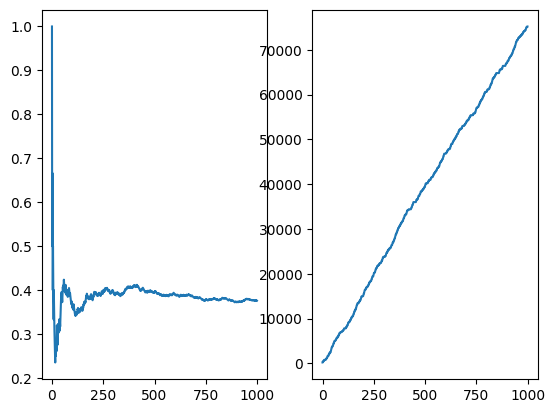

In [11]:

import random as rnd
import matplotlib.pyplot as plt

def sim_tinas(N, a, b, c):
    costo = 0
    lista = []
    costos = []
    contador = 0

    for i in range(N):
        u_1 = rnd.triangular(a, b, c)
        u_2 = rnd.triangular(a, b, c)
        u_3 = rnd.triangular(a, b, c)
        u_4 = rnd.triangular(a, b, c)
        u_5 = rnd.triangular(a, b, c)

        if u_1 + u_2 + u_3 + u_4 + u_5 > 1000:
            contador += 1
            costo += 200

        prob = contador / (i + 1)
        lista.append(prob)
        costos.append(costo)

    return lista, costos

# Parámetros de la simulación
N = 1000
a = 100
b = 200
c = 300

# Ejecutar la simulación
probabilidades, costos = sim_tinas(N, a, b, c)


# Gráfica de probabilidad acumulada
plt.subplot(1, 2, 1)
plt.plot(probabilidades)

# Gráfica de costos acumulados
plt.subplot(1, 2, 2)
plt.plot(costos)
plt.show()